# Regresión Logística
Se muestran dos ejemplos de regresión logística: clasificación binaria y clasificación multi-clase.

### (1) Regresión Logística Binaria
Se utiliza el conjunto de datos "Titanic" provisto originalmente en una competencia Kaggle:
https://www.kaggle.com/c/titanic/

#### Importación de librerías

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Datos

In [23]:
datos = pd.read_csv("titanic_train.csv")
datos.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### Limpieza del conjunto de datos
* Los valores NaN de la edad se reemplazan por la media de la edad
* Se elimina la columna de la cabina
* Se eliminan los registros con valores faltantes

In [24]:
datos['Age'] = datos['Age'].fillna(int(datos['Age'].mean()))
datos.drop("Cabin",inplace=True,axis=1)
datos.dropna(inplace=True)

datos.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


Se cambian los valores categóricos a valores numéricos (binarización)

In [25]:
sex = pd.get_dummies(datos["Sex"],drop_first=True)
embarked = pd.get_dummies(datos["Embarked"],drop_first=True)
pclass = pd.get_dummies(datos["Pclass"],drop_first=True)

datos = pd.concat([datos,pclass,sex,embarked],axis=1)

datos.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,0,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,1,1,0,1


Se eliminan las columnas que no se utilizarán en el modelo

In [26]:
datos.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

datos.head(8)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
5,0,29.0,0,0,8.4583,0,1,1,1,0
6,0,54.0,0,0,51.8625,0,0,1,0,1
7,0,2.0,3,1,21.0750,0,1,1,0,1


#### Creación del modelo

In [27]:
x = datos.drop("Survived",axis=1)
y = datos["Survived"]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [29]:
# Crear modelo de regresión logística
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/jorgeo80/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluación del modelo
Como referencia, se puede utilizar el recurso siguiente:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [30]:
# Estimar la clase
y_pred = logreg.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1]


In [31]:
# Estimar la probabilidad de clase
p_pred = logreg.predict_proba(x_test)
print(p_pred)

[[0.3128151  0.6871849 ]
 [0.98949569 0.01050431]
 [0.1459484  0.8540516 ]
 [0.68592648 0.31407352]
 [0.74371324 0.25628676]
 [0.81203709 0.18796291]
 [0.73593757 0.26406243]
 [0.72711304 0.27288696]
 [0.45427442 0.54572558]
 [0.6426599  0.3573401 ]
 [0.58197471 0.41802529]
 [0.06428781 0.93571219]
 [0.26688803 0.73311197]
 [0.73200218 0.26799782]
 [0.26455872 0.73544128]
 [0.91471375 0.08528625]
 [0.24101955 0.75898045]
 [0.50689111 0.49310889]
 [0.88249481 0.11750519]
 [0.07284943 0.92715057]
 [0.62367715 0.37632285]
 [0.07057125 0.92942875]
 [0.67951989 0.32048011]
 [0.71051053 0.28948947]
 [0.94084583 0.05915417]
 [0.84025606 0.15974394]
 [0.33117    0.66883   ]
 [0.60773267 0.39226733]
 [0.67963424 0.32036576]
 [0.81026877 0.18973123]
 [0.53213244 0.46786756]
 [0.75297795 0.24702205]
 [0.74294265 0.25705735]
 [0.25074755 0.74925245]
 [0.66465766 0.33534234]
 [0.87726339 0.12273661]
 [0.90641924 0.09358076]
 [0.91873206 0.08126794]
 [0.76746739 0.23253261]
 [0.92404432 0.07595568]


In [32]:
# Mostrar las estadísticas del desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.76      0.65      0.70       110

    accuracy                           0.77       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



In [33]:
# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[134  23]
 [ 38  72]]


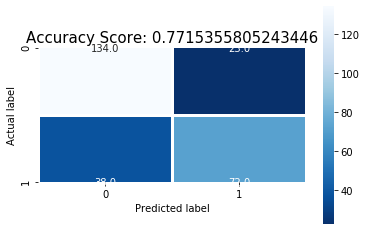

In [34]:
import seaborn as sns

score = logreg.score(x_test,y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### (2) Regresión Logística Multi-clase
Se utiliza el conjunto de datos de dígitos escritos a mano MNIST

#### Datos

In [35]:
from sklearn.datasets import load_digits
digitos = load_digits()

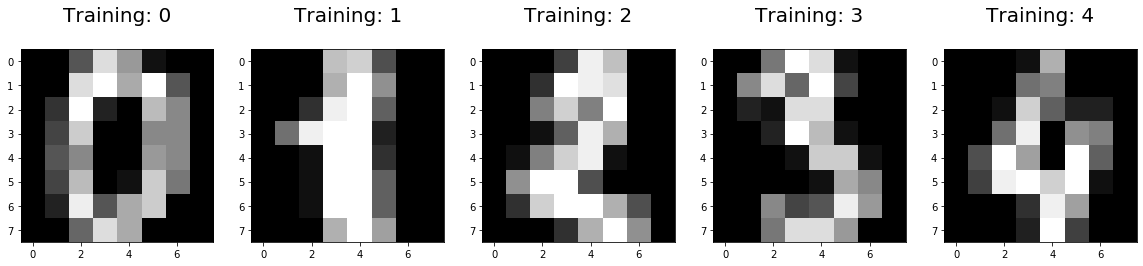

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i, (imagen, etiqueta) in enumerate(zip(digitos.data[0:5], digitos.target[0:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(imagen, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % etiqueta, fontsize = 20)

#### Creación del modelo

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digitos.data, digitos.target, 
                                                    test_size=0.25, random_state=0)

In [38]:
# Crear modelo de regresión logística
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/home/jorgeo80/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jorgeo80/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluación del modelo
Como referencia, se puede utilizar el recurso siguiente:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [39]:
# Estimar la clase
y_pred = model.predict(x_test)
print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 8 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 1 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 1 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 9 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 8 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 9 3 2 6 5 5 9 1 3 7 0 0 3 0 4 5 9 3 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


In [40]:
# Estimar la probabilidad de clase
y_pred_proba = model.predict_proba(x_test)
print(y_pred_proba)

[[2.04008944e-09 8.63861185e-11 9.99996471e-01 ... 8.78183278e-09
  3.51492953e-06 1.11557394e-11]
 [3.27914133e-10 1.21183110e-06 7.22995115e-06 ... 5.02000045e-11
  6.95450257e-01 1.83511170e-09]
 [2.57674325e-16 3.69888116e-10 9.99997686e-01 ... 1.40550266e-10
  2.30797245e-06 2.29215260e-12]
 ...
 [1.56780870e-08 2.26446196e-06 3.49345560e-14 ... 9.63873100e-14
  1.40416325e-06 4.30106039e-06]
 [7.41723792e-17 7.58783180e-01 6.62209501e-09 ... 4.41213084e-13
  1.14743735e-01 2.74071994e-14]
 [3.37623555e-07 1.41632171e-15 5.58999005e-11 ... 1.38288719e-13
  4.36455121e-06 9.99994284e-01]]


In [43]:
print(model.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


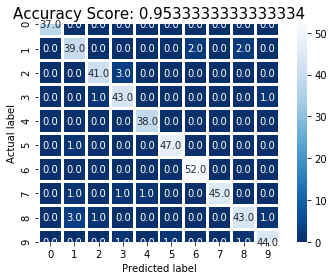

In [48]:
import seaborn as sns

score = model.score(x_test,y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'Etiqueta: 5\nPrediccion: 5\n')

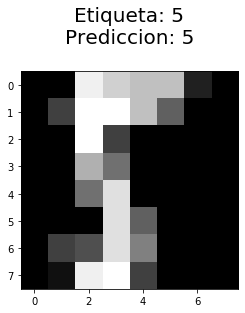

In [49]:
# Índice en el subconjunto de datos de prueba x_test
indice = 9

plt.imshow(np.reshape(x_test[indice], (8,8)), cmap = plt.cm.gray)
plt.title('Etiqueta: %i\nPrediccion: %i\n' % (y_test[indice],y_pred[indice]), fontsize = 20)